<a href="https://colab.research.google.com/github/nikhilnair31/ST380/blob/main/ML_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to Machine Learning Take Home Exam - Carlos M. Carvalho**
- Texas MSBA
- McCombs School of Business
- Due: July 30 at 10pm (CT)

## Initital Setup

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Book Problems

### Chapter 2: \#10

#### 10. This exercise involves the Boston housing data set.

##### (a) To begin, load in the Boston data set, which is part of the ISLP library.

Had to pull Boston dataset using a different approach since the new version of scikit-learn lacks the dataset

In [ ]:
from sklearn.datasets import fetch_openml

boston_data = fetch_openml(name='boston', version=1, as_frame=False)
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

df['MEDVAL'] = boston_data.target
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDVAL   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,4.636364,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,2.443456,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,3.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,8.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### (b) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [ ]:
df.shape

(506, 14)

506 rows and 14 columns

Since this dataset doesn't exist in sklearn anymore there's no command to list what each predictor represents, but I'm listing below the definition of each:
- crim: per capita crime rate by town.
- zn: proportion of residential land zoned for lots over 25,000 sq.ft.
- indus: proportion of non-retail business acres per town.
- chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox: nitrogen oxides concentration (parts per 10 million).
- rm: average number of rooms per dwelling.
- age: proportion of owner-occupied units built prior to 1940.
- dis: weighted mean of distances to five Boston employment centres.
- rad: index of accessibility to radial highways.
- tax: full-value property-tax rate per \$10,000.
- ptratio: pupil-teacher ratio by town.
- b: proportion of blacks by town.
- lstat: lower status of the population (percent).
- medval: median value of owner-occupied homes in $1000s.

##### (c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your fndings.

###### (i) All plots

Used Seaborn here in particular due to the convenience of PairGrid

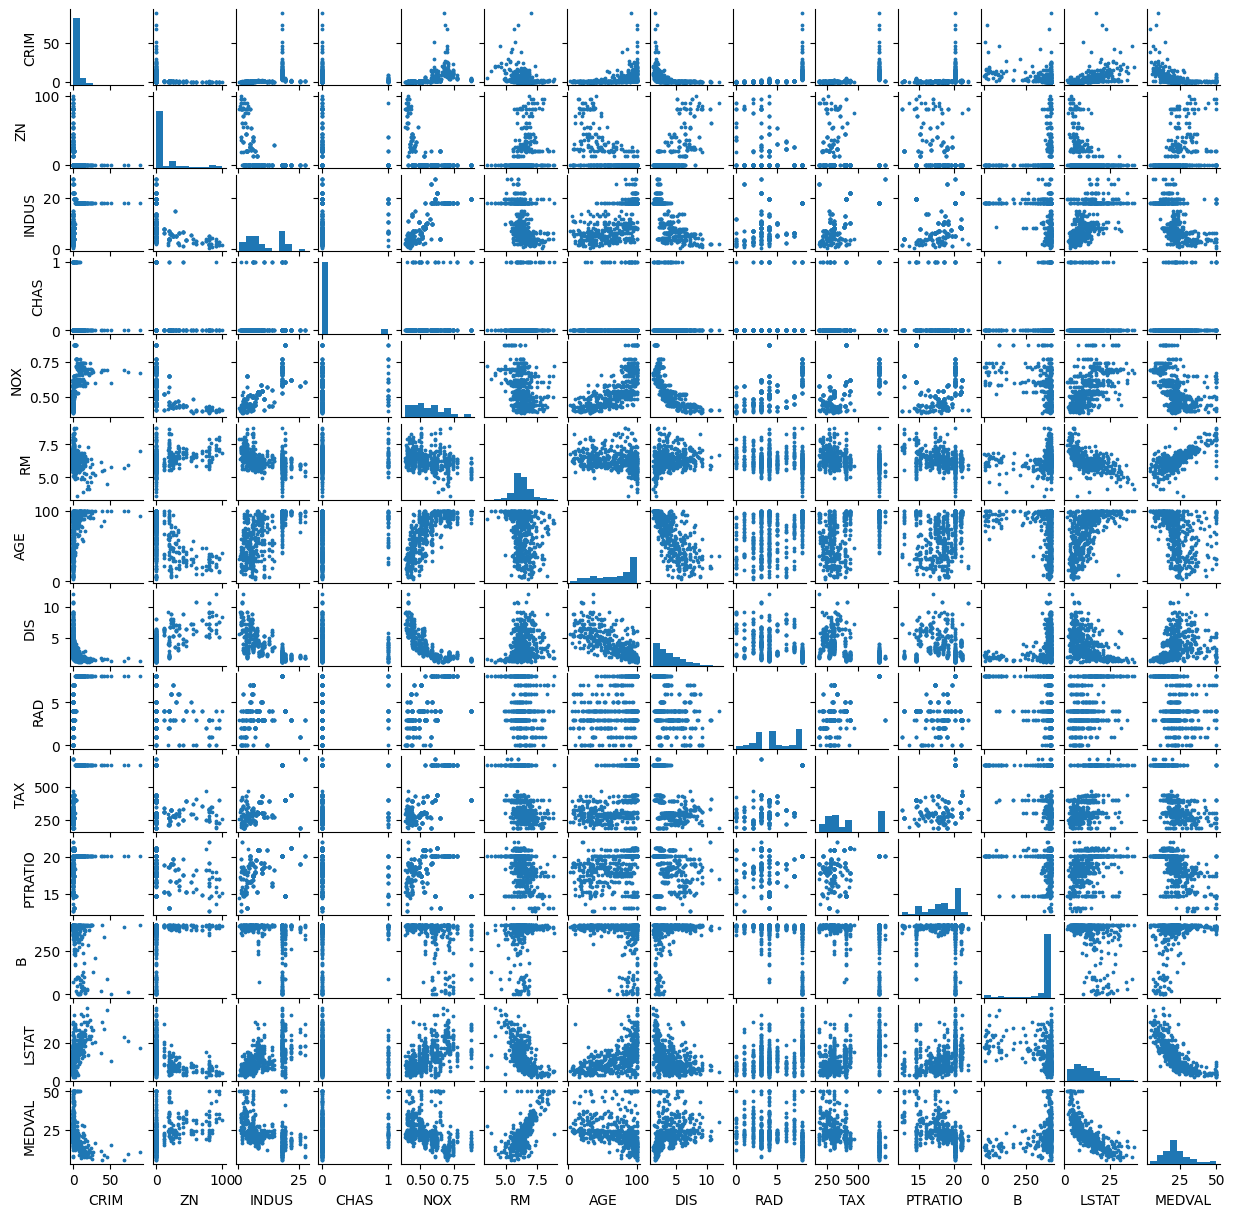

In [ ]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(12, 12)

###### (I) B vs. CRIM

Text(0, 0.5, 'CRIM')

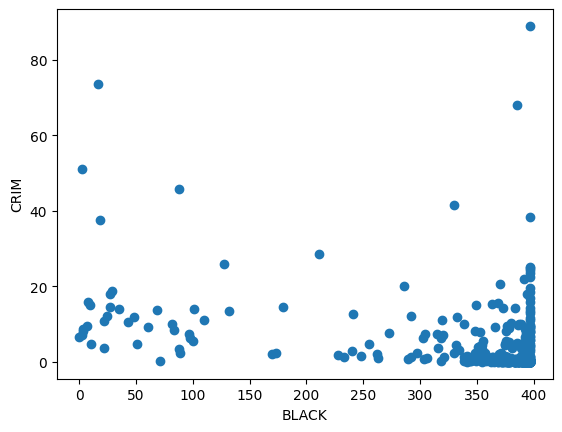

In [ ]:
plt.scatter(df['B'], df['CRIM'])
plt.xlabel('BLACK')
plt.ylabel('CRIM')

No discernible connection between B and CRIM seems to be present.

###### (Ii) TAX vs. NOX

Text(0, 0.5, 'NOX')

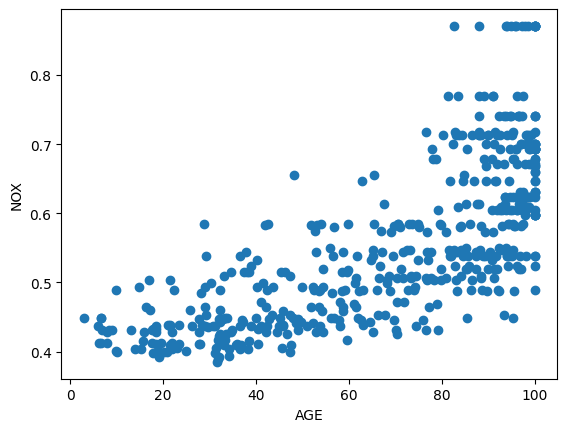

In [ ]:
plt.scatter(df['AGE'], df['NOX'])
plt.xlabel('AGE')
plt.ylabel('NOX')

A noticeable, non-linear positive relationship exists between AGE and NOX. This suggests that NOX concentration tends to be higher in areas where properties are older.

###### (iIi) RM vs. MEDVAL

Text(0, 0.5, 'MEDVAL')

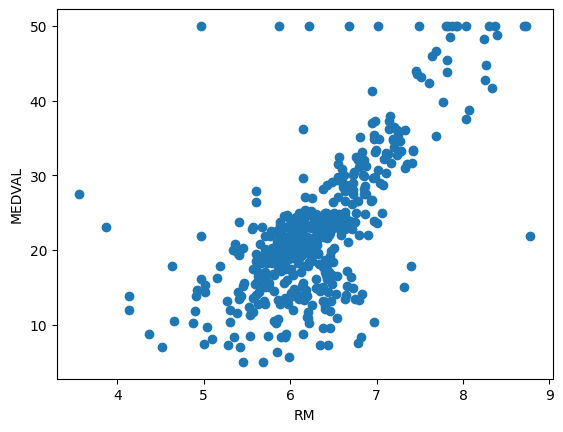

In [ ]:
plt.scatter(df['RM'], df['MEDVAL'])
plt.xlabel('RM')
plt.ylabel('MEDVAL')

A positive linear relationship can be observed between RM and MEDVAL. This is logical because an increase in RM signifies more rooms, which typically leads to higher prices owing to the additional space.

###### (iv) LSTAT vs. MEDVAL

Text(0, 0.5, 'MEDVAL')

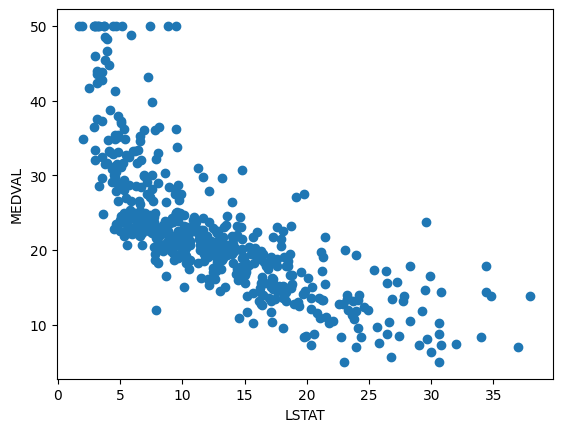

In [ ]:
plt.scatter(df['LSTAT'], df['MEDVAL'])
plt.xlabel('LSTAT')
plt.ylabel('MEDVAL')

The correlation between LSTAT and MEDVAL appears to be both negative and non-linear, which is alligns as a lower proportion of individuals with lower socioeconomic status in the region would influence the median house value negatively.

###### (v) RM vs. LSTAT

Text(0, 0.5, 'LSTAT')

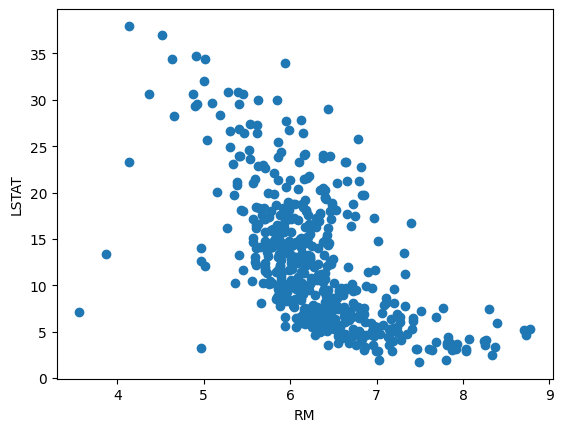

In [ ]:
plt.scatter(df['RM'], df['LSTAT'])
plt.xlabel('RM')
plt.ylabel('LSTAT')

There seems to be an inverse correlation between LSTAT and RM. This makes sense because people with lower incomes, indicating higher LSTAT, may find it challenging to afford larger houses, denoted by higher RM.

##### (d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

In [ ]:
df.corrwith(df['CRIM']).sort_values(ascending=False)

CRIM       1.000000
TAX        0.582764
RAD        0.522855
LSTAT      0.455621
NOX        0.420972
INDUS      0.406583
AGE        0.352734
PTRATIO    0.289946
CHAS      -0.055892
ZN        -0.200469
RM        -0.219247
DIS       -0.379670
B         -0.385064
MEDVAL    -0.388305
dtype: float64

Based on the prior scatterplots and correlations, we will examine the three variables with the largest correlations: TAX, RAD, and LSTAT. These variables are most likely to have a significant impact on the target variable.

Text(0, 0.5, 'CRIM')

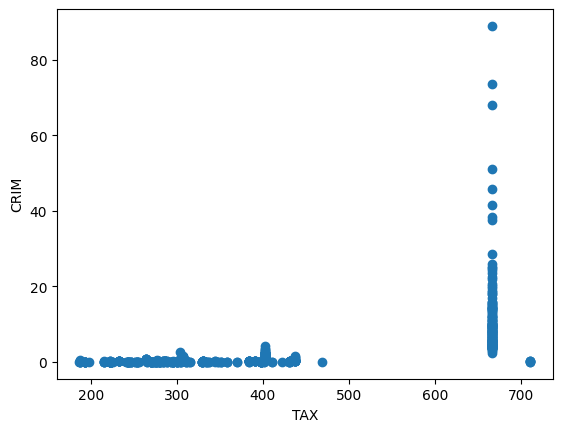

In [ ]:
# Had to use basic scatter plot since TAX has continuous values
plt.scatter(df['TAX'], df['CRIM'])
plt.xlabel('TAX')
plt.ylabel('CRIM')

When the TAX variable reaches a value of 666, the range and average values of CRIM tend to be much higher, suggesting a strong association between this specific value of TAX and increased crime rates.

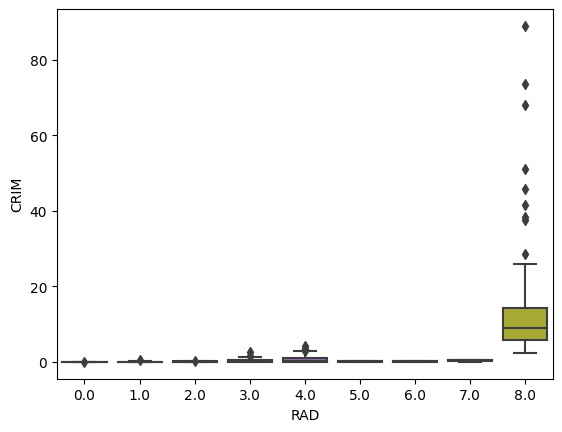

In [ ]:
# Used box and whisker plot since RAD has few discrete values
ax = sns.boxplot(x="RAD", y="CRIM", data=df)

When the RAD variable reaches its highest value of 8, the range and average values of CRIM tend to be much higher, suggesting a strong association between higher values of RAD and increased crime rates.

Text(0, 0.5, 'CRIM')

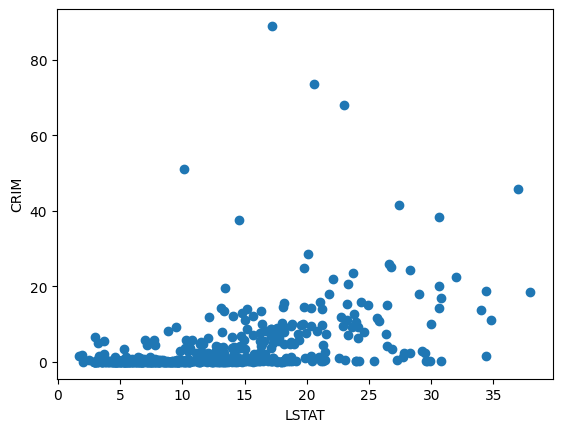

In [ ]:
plt.scatter(df['LSTAT'], df['CRIM'])
plt.xlabel('LSTAT')
plt.ylabel('CRIM')

For LSTAT values below 10, the CRIM generally remains low, implying that areas with a smaller proportion of lower status individuals typically exhibit lower crime rates. However, when LSTAT exceeds 10, the CRIM values show a wider range, suggesting that as the percentage of lower status individuals increases, the crime rates become more varied among different areas.

Text(0, 0.5, 'CRIM')

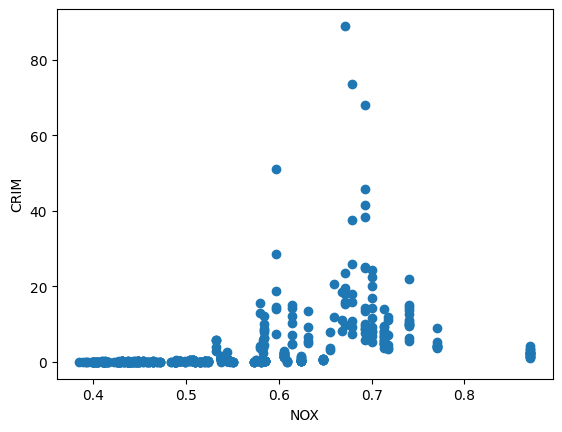

In [ ]:
plt.scatter(df['NOX'], df['CRIM'])
plt.xlabel('NOX')
plt.ylabel('CRIM')

For NOX values till 0.5, the CRIM generally remains low, but when it exceeds 0.5 is when the CRIM values show a wider range, suggesting that as the nitrogen oxides concentration increases, the crime rates become more pronounced and varied.

##### (e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

Overall summary of each of the predictors

In [ ]:
df[["CRIM", "TAX", "PTRATIO"]].describe()

,CRIM,TAX,PTRATIO
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677083,666.000000,20.200000
max,88.976200,711.000000,22.000000


Taking top 3 suburbs for each CRIM, TAX and PTRATIO

In [ ]:
df.loc[df['CRIM'].nlargest(3).index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,8.0,666.0,20.2,396.90,17.21,10.4
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,8.0,666.0,20.2,16.45,20.62,8.8
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,8.0,666.0,20.2,384.97,22.98,5.0


These suburbs are particularly high in CRIM as compared to other suburbs based on how all are above the 75th% and near the maximum value for CRIM.

In [ ]:
df.loc[df['TAX'].nlargest(3).index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,3.0,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,3.0,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,3.0,711.0,20.1,318.43,29.68,8.1


All the suburbs above have the maximum TAX level possible.

In [ ]:
df.loc[df['PTRATIO'].nlargest(3).index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,3.0,334.0,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,3.0,334.0,22.0,376.04,5.57,20.6
127,0.25915,0.0,21.89,0.0,0.624,5.693,96.0,1.7883,3.0,437.0,21.2,392.11,17.19,16.2


All the suburbs above have near maximum PTRATIO values.

##### (f) How many of the suburbs in this data set bound the Charles river?

In [ ]:
print(f"# of suburbs that bound the Charles river: {df['CHAS'].value_counts()[1]}")

# of suburbs that bound the Charles river: 35


##### (g) What is the median pupil-teacher ratio among the towns in this data set?

In [ ]:
print(f"Median pupil-teacher ratio: {df['PTRATIO'].median()}")

Median pupil-teacher ratio: 19.05


##### (h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your fndings.

In [ ]:
lowest_medval_sub = df['MEDVAL'].idxmin()
print("Suburb # with lowest MEDVAL: ", lowest_medval_sub)

Suburb # with lowest MEDVAL:  398


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,4.636364,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,2.443456,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,3.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,8.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.loc[lowest_medval_sub].round(2)

CRIM        38.35
ZN           0.00
INDUS       18.10
CHAS         0.00
NOX          0.69
RM           5.45
AGE        100.00
DIS          1.49
RAD          8.00
TAX        666.00
PTRATIO     20.20
B          396.90
LSTAT       30.59
MEDVAL       5.00
Name: 398, dtype: float64

Suburb #398, in comparison to other suburbs has:
- above 75th% of CRIM
- minimum ZN
- INDUS in 75th%
- does not bound the Charles river
- above 75th% of NOX
- below 25th% of RM
- maximum AGE
- near minimum DIS
- maximum RAD
- TAX in 75th%
- PTRATIO in 75th%
- B maximum
- above 75th% of LSTAT

##### (i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [ ]:
print("# of suburbs with > 7 rooms per dwelling: ", len(df[df['RM']>7]))
print("# of suburbs with > 8 rooms per dwelling: ", len(df[df['RM']>8]))

# of suburbs with > 7 rooms per dwelling:  64
# of suburbs with > 8 rooms per dwelling:  13


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,4.636364,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,2.443456,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,3.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,8.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df[df['RM']>8].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,5.307692,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,2.097006,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,1.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,4.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,6.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,7.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,8.000000,666.000000,20.200000,396.900000,7.440000,50.000000


As compared to overall suburbs, those with > 8 RM have:
- lower CRIM
- lower INDUS proportion
- lower LSTAT
- higher MEDVAL

### Chapter 3: \#15

#### 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

##### Setup

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.datasets import fetch_openml

boston_data = fetch_openml(name='boston', version=1, as_frame=False)
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

df['MEDVAL'] = boston_data.target
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDVAL   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,4.636364,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,2.443456,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,3.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,8.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### (a) For each predictor, ft a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically signifcant association between the predictor and the response? Create some plots to back up your assertions.

In [ ]:
simple_coeffs = {}
print(f"{'predictor':<20} {'coef':<20} {'pval':<20} {'significant?':<20}")
for predictor in boston_data.feature_names[1:]:
    X = df[predictor].values.reshape(-1, 1)
    y = df['CRIM']

    lr = LinearRegression()

    lr.fit(X, y)

    X = sm.add_constant(X)
    simple_lr_sm = sm.OLS(y, X).fit()

    simple_coeffs[predictor] = lr.coef_[0]
    print(f"{predictor:<20} {lr.coef_[0]:<20.3f} {simple_lr_sm.pvalues[1]:<20.3f} {'not' if simple_lr_sm.pvalues[1] > 0.05 else 'yes'}")

predictor            coef                 pval                 significant?        
ZN                   -0.074               0.000                yes
INDUS                0.510                0.000                yes
CHAS                 -1.893               0.209                not
NOX                  31.249               0.000                yes
RM                   -2.684               0.000                yes
AGE                  0.108                0.000                yes
DIS                  -1.551               0.000                yes
RAD                  1.841                0.000                yes
TAX                  0.030                0.000                yes
PTRATIO              1.152                0.000                yes
B                    -0.036               0.000                yes
LSTAT                0.549                0.000                yes


By analyzing the p-values of the regression coefficient estimates for each predictor, we see that with a chosen p-value cutoff of 5%, all predictors except for CHAS exhibit statistically significant associations with CRIM.

We will now generate plots for each predictor against MEDVAL.

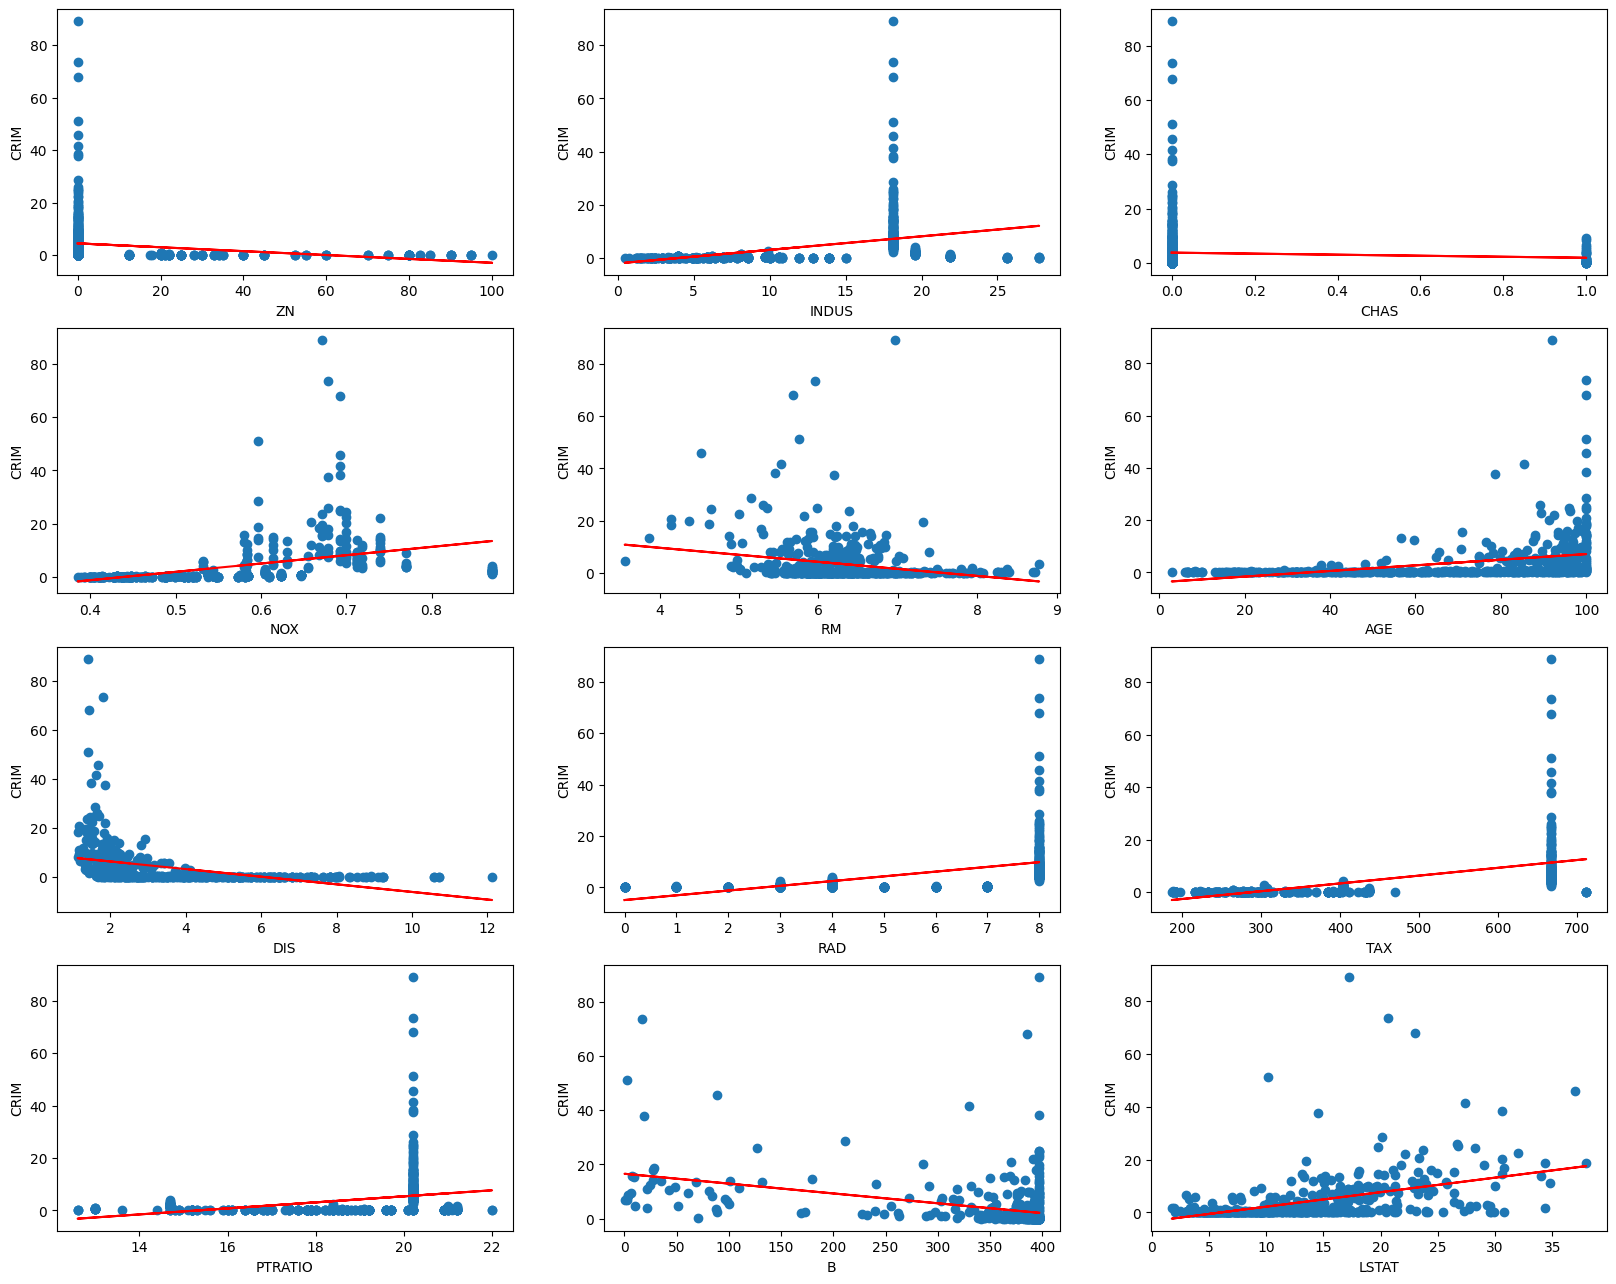

In [ ]:
plt.figure(figsize=(20, 20))

for i, predictor in enumerate(boston_data.feature_names[1:]):
    model = 'CRIM ~ ' + predictor
    res = smf.ols(formula = model, data=df).fit()
    plt.subplot(5,3,i+1)
    plt.xlabel(predictor)
    plt.ylabel("CRIM")
    plt.scatter(df[predictor], df['CRIM'])
    plt.plot(df[predictor], res.fittedvalues, color='red')

The charts clearly show a near flat (slope = 0) line for CHAS vs CRIM which supports the above presented claim that CHAS doesn't exhibit statistically significant associations with CRIM.

##### (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [ ]:
X = df.drop('CRIM', axis=1)
y = df['CRIM']

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

X = sm.add_constant(X)
mul_lr_sm = sm.OLS(y, X).fit()

In [ ]:
print(mul_lr_sm.summary())

print("\n==============================================================================\n")

print(f"{'predictor':<10} {'significant':<10}?")
for predictor, p_value in zip(X.columns[1:], mul_lr_sm.pvalues[1:]):
    if p_value > 0.05:
        print(f"{predictor:<10} yes")
    else:
        print(f"{predictor:<10} no")

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     26.93
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.69e-49
Time:                        06:02:35   Log-Likelihood:                -1670.4
No. Observations:                 506   AIC:                             3369.
Df Residuals:                     492   BIC:                             3428.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7520      7.169      0.663      0.5

Based on the analysis of the multiple regression model and inspecting the t-statistics and p-values, we find that all predictors except ZN, DIS, RAD, TAX, B, LSTAT, and MEDV have statistically significant associations with the response variable at the 5% significance level. In other words, we can reject the null hypothesis (H0) for the listed predictors.

##### (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefcients from (a) on the x-axis, and the multiple regression coefcients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefcient in a simple linear regression model is shown on the x-axis, and its coefcient estimate in the multiple linear regression model is shown on the y-axis.

In [ ]:
multiple_coeffs = {}
for predictor in boston_data.feature_names[1:]:
    multiple_coeffs[predictor] = mul_lr_sm.params[predictor]

In [ ]:
print(f"simple_coeffs: {simple_coeffs}")
print(f"multiple_coeffs: {multiple_coeffs}")

simple_coeffs: {'ZN': -0.0739349774041235, 'INDUS': 0.5097763311042312, 'CHAS': -1.892776550803761, 'NOX': 31.248531201122912, 'RM': -2.684051224113947, 'AGE': 0.10778622713953306, 'DIS': -1.5509016824100996, 'RAD': 1.8405746698426093, 'TAX': 0.029742252822765363, 'PTRATIO': 1.1519827870705852, 'B': -0.03627964056733073, 'LSTAT': 0.5488047820623981}
multiple_coeffs: {'ZN': 0.04594194278213773, 'INDUS': -0.1583088282114008, 'CHAS': -0.4899224805567086, 'NOX': -6.8568447076667685, 'RM': 0.639040066606289, 'AGE': -0.006365031102130894, 'DIS': -1.0480328423568717, 'RAD': 0.6630271534722262, 'TAX': 0.015795818741076956, 'PTRATIO': -0.015014089869491607, 'B': -0.010020380571961801, 'LSTAT': 0.1769907722987928}


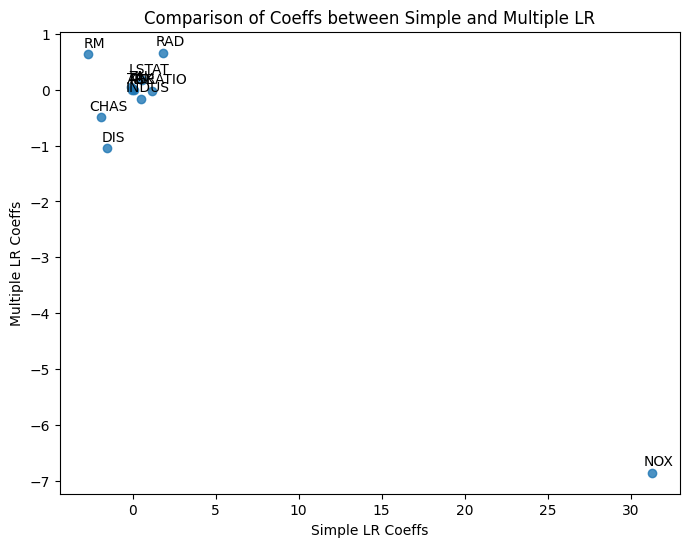

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(list(simple_coeffs.values()), list(multiple_coeffs.values()), alpha=0.8)
plt.xlabel('Simple LR Coeffs')
plt.ylabel('Multiple LR Coeffs')
plt.title('Comparison of Coeffs between Simple and Multiple LR')

for predictor in boston_data.feature_names[1:]:
    plt.annotate(predictor, (simple_coeffs[predictor], multiple_coeffs[predictor]), textcoords="offset points", xytext=(5,5), ha='center')

plt.show()

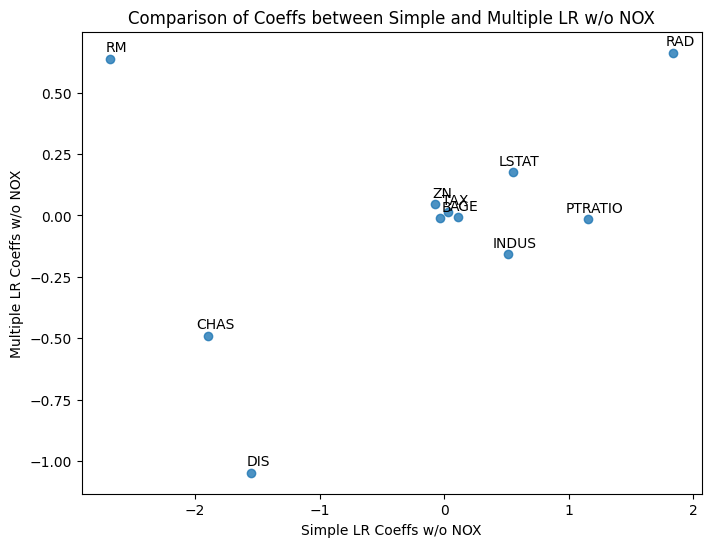

In [ ]:
simple_coeffs_values_wo_nox = [coef for predictor, coef in simple_coeffs.items() if predictor != "NOX"]
multiple_coeffs_values_wo_nox = [coef for predictor, coef in multiple_coeffs.items() if predictor != "NOX"]

plt.figure(figsize=(8, 6))
plt.scatter(list(simple_coeffs_values_wo_nox), list(multiple_coeffs_values_wo_nox), alpha=0.8)
plt.xlabel('Simple LR Coeffs w/o NOX')
plt.ylabel('Multiple LR Coeffs w/o NOX')
plt.title('Comparison of Coeffs between Simple and Multiple LR w/o NOX')

for predictor in boston_data.feature_names[1:]:
    plt.annotate(predictor, (simple_coeffs[predictor], multiple_coeffs[predictor]), textcoords="offset points", xytext=(5,5), ha='center')

plt.show()

In [ ]:
pd.DataFrame({'Simple LR Coeffs': simple_coeffs.values(), 'Multiple LR Coeffs': multiple_coeffs.values()}, index=simple_coeffs.keys())

,Simple LR Coeffs,Multiple LR Coeffs
ZN,-0.073935,0.045942
INDUS,0.509776,-0.158309
CHAS,-1.892777,-0.489922
NOX,31.248531,-6.856845
RM,-2.684051,0.639040
AGE,0.107786,-0.006365
DIS,-1.550902,-1.048033
RAD,1.840575,0.663027
TAX,0.029742,0.015796
PTRATIO,1.151983,-0.015014


As can be seen from the two plots and table above there's a reasonable correlation between the coefficients of the individual and multiple regressions, except for some outliers like NOX.

However, since we reject the null hypothesis for ZN, DIS, RAD, TAX, B, LSTAT and MEDV, the other values are not very meaningful. We would also expect them to differ significantly between the individual and multiple regression case, since in the former the coefficient is the average change in the response from a unit change in the predictor completely ignoring the other predictors. In the latter case, the coefficient is the average change in the response from a unit change in the predictor while holding the other predictor fixed. Because of possible correlations, non-linearities and collinearities between the predictors, there is no expectancy that, in general, the coefficients in each case will be of the same magnitude or sign.

##### (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, ft a model of the form Y = β0 + β1X + β2X2 + β3X3 + ".

Coeffs of each predictor
------------------------------------------------------------------------------
predictor  β0         β1         β2         β3         P         
ZN         0.000      0.003      0.094      0.230      0.000     
INDUS      0.020      0.000      0.000      0.000      0.000     
CHAS       0.000      0.209      0.209      0.209      0.209     
NOX        0.000      0.000      0.000      0.000      0.000     
RM         0.081      0.212      0.364      0.509      0.000     
AGE        0.358      0.143      0.047      0.007      0.000     
DIS        0.000      0.000      0.000      0.000      0.000     
RAD        0.282      0.003      0.000      0.000      0.000     
TAX        0.105      0.110      0.137      0.244      0.000     
PTRATIO    0.002      0.003      0.004      0.006      0.000     
B          0.000      0.139      0.474      0.544      0.000     
LSTAT      0.554      0.335      0.065      0.130      0.000     




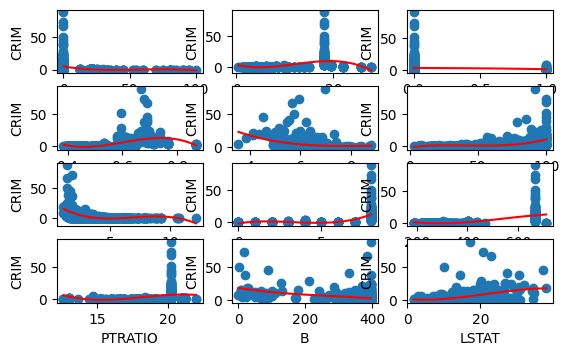

In [ ]:
coeffs = {}

print(f"Coeffs of each predictor\n------------------------------------------------------------------------------")
print(f"{'predictor':<10} {'β0':<10} {'β1':<10} {'β2':<10} {'β3':<10} {'P':<10}")

for i, predictor in enumerate(boston_data.feature_names[1:]):
    model = 'CRIM ~ ' + predictor + " + np.power(" + predictor + ", 2) + np.power(" + predictor + ", 3)"
    res = smf.ols(formula = model, data=df).fit()
    coeffs[predictor] = [res.params[predictor]]
    print(f"{predictor:<10} {res.pvalues[0]:<10.3f} {res.pvalues[1]:<10.3f} {res.pvalues[2]:<10.3f} {res.pvalues[3]:<10.3f} {res.f_pvalue:<10.3f}")
    plt.subplot(5,3,i+1)
    plt.xlabel(predictor)
    plt.ylabel("CRIM")
    plt.scatter(df[predictor], df['CRIM'])
    x = np.linspace(min(df[predictor]),max(df[predictor]), 100)
    y = res.params[0] + x*res.params[1]+ res.params[2]*(x**2)+ res.params[3]*(x**3)
    plt.plot(x, y, color='red')

print(f"\n==============================================================================\n")

From the plots and table above, we can find evidence of a non-linear association, cubic type, between INDUS, NOX, AGE, DIS, PTRATIO and LSTAT.

### Chapter 6: \#9 and \#11

#### 9. In this exercise, we will predict the number of applications received using the other variables in the College data set.








##### Setup

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/College.csv')

In [ ]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
df.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [ ]:
df['Private'] = df['Private'].replace({'Yes': 1, 'No': 0})

In [ ]:
df.head(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


##### (a) Split the data set into a training set and a test set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(["Unnamed: 0", "Apps", "Grad.Rate"], axis=1)

In [ ]:
X.head()

,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend
0,1,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041
1,1,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527
2,1,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735
3,1,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016
4,1,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922


In [ ]:
y = df['Apps']

In [ ]:
y.head()

0    1660
1    2186
2    1428
3     417
4     193
Name: Apps, dtype: int64

In [ ]:
X_train,  X_test,  y_train,  y_test  =  train_test_split(X, y, test_size=0.2, random_state=42)

##### (b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [ ]:
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = sqrt(lr_mse)
print(f"Linear Regression Test\nMSE: {lr_mse:.3f}\nRMSE: {lr_rmse:.3f}")

Linear Regression Test
MSE: 1508847.951
RMSE: 1228.352


##### (c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [ ]:
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
ridge = Ridge()
scaler = StandardScaler()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200]}
cv=5

In [ ]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
grid_search = GridSearchCV(ridge, param_grid, cv=cv)

grid_search.fit(X_train, y_train)

ridge_best_lambda = grid_search.best_params_['alpha']
print(f"Best Ridge λ value: {ridge_best_lambda}")

Best Ridge λ value: 10


In [ ]:
ridge_model = Ridge(alpha=ridge_best_lambda)

ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = sqrt(ridge_mse)
ridge_non_zero_coeffs = np.sum(ridge_model.coef_ != 0)
print(f"Ridge Test\nMSE: {ridge_mse:.3f}\nRMSE: {ridge_rmse:.3f}\n")
print(f"Number of non-zero coefficient estimates: {ridge_non_zero_coeffs}")

Ridge Test
MSE: 1494862.171
RMSE: 1222.646

Number of non-zero coefficient estimates: 16


##### (d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefcient estimates.

In [ ]:
from math import sqrt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
lasso = Lasso()
scaler = StandardScaler()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200]}
cv=5

In [ ]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
grid_search = GridSearchCV(ridge, param_grid, cv=cv)

grid_search.fit(X_train, y_train)

lasso_best_lambda = grid_search.best_params_['alpha']
print(f"Best Lasso λ value: {lasso_best_lambda}")

Best Lasso λ value: 10


In [ ]:
lasso_model = Lasso(alpha=lasso_best_lambda)

lasso_model.fit(X_train, y_train)

lasso_predictions = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = sqrt(lasso_mse)
lasso_non_zero_coeffs = np.sum(lasso_model.coef_ != 0)
print(f"Lasso Test\nMSE: {lasso_mse:.3f}\nRMSE: {lasso_rmse:.3f}\n")
print(f"Number of non-zero coefficient estimates: {lasso_non_zero_coeffs}")

Lasso Test
MSE: 1493464.956
RMSE: 1222.074

Number of non-zero coefficient estimates: 16


##### (e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [ ]:
from math import sqrt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
max_components = min(X_train.shape[0], X_train.shape[1])

cross_val_errors = []
for m in range(1, max_components + 1):
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(X_train)
    cv_scores = cross_val_score(LinearRegression(), X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
    cross_val_errors.append(-np.mean(cv_scores))

optimal_m = np.argmin(cross_val_errors) + 1
print(f"Optimal number of components (M) for PCR: {optimal_m}")

Optimal number of components (M) for PCR: 16


In [ ]:
pca = PCA(n_components=optimal_m)
X_train_pca = pca.fit_transform(X_train)
pca_model = LinearRegression().fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)
y_pred = pca_model.predict(X_test_pca)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = sqrt(test_mse)
print(f"PCR Test\nMSE: {test_mse:.3f}\nRMSE: {test_rmse:.3f}")

PCR Test
MSE: 1508847.951
RMSE: 1228.352


##### (f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [ ]:
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [ ]:
param_grid = {
    'n_components': np.arange(1, min(X_train.shape[0], X_train.shape[1]) + 1)
}

grid_search = GridSearchCV(PLSRegression(), param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

best_M = grid_search.best_params_['n_components']
print(f"Value of M selected by cross-validation for PLS: {best_M}")

Value of M selected by cross-validation for PLS: 12


In [ ]:
pls_model = PLSRegression(n_components=best_M)
pls_model.fit(X_train, y_train)

y_pred = pls_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = sqrt(test_mse)
print(f"PLS Test\nMSE: {test_mse:.3f}\nRMSE: {test_rmse:.3f}")

PLS Test
MSE: 1499369.762
RMSE: 1224.488


##### (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much diference among the test errors resulting from these fve approaches?

The accuracy of the predictions and the test errors vary very slightly among each of the 5 approaches (Linear Regresion, Ridge, Lasso, PCR and PLS) with all their MSEs around 1500000 and RMSEs around 1230.

Also the λ in Ridge and Lasso was the same at 10 with number of non-zero as 16.The M in PCR was 16 but in PLS was 12.

#### 11. We will now try to predict per capita crime rate in the Boston data set.

##### Setup

In [75]:
from sklearn.datasets import fetch_openml

boston_data = fetch_openml(name='boston', version=1, as_frame=False)
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

df['MEDVAL'] = boston_data.target
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,396.90,5.33,36.2


In [76]:
df.shape

(506, 14)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDVAL   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [78]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,4.636364,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,2.443456,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,3.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,8.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### (a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

In [80]:
k = 10
folds = np.random.randint(1, k + 1, size=df.shape[0])
i = 1
train_data = df[folds != i]
test_data = df[folds == i]
test_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,2.0,222.0,18.7,396.90,5.33,36.2
10,0.22489,12.5,7.87,0.0,0.5240,6.377,94.3,6.3467,4.0,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.5240,6.009,82.9,6.2267,4.0,311.0,15.2,396.90,13.27,18.9
16,1.05393,0.0,8.14,0.0,0.5380,5.935,29.3,4.4986,3.0,307.0,21.0,386.85,6.58,23.1
24,0.75026,0.0,8.14,0.0,0.5380,5.924,94.1,4.3996,3.0,307.0,21.0,394.33,16.30,15.6
40,0.03359,75.0,2.95,0.0,0.4280,7.024,15.8,5.4011,2.0,252.0,18.3,395.62,1.98,34.9
46,0.18836,0.0,6.91,0.0,0.4480,5.786,33.3,5.1004,2.0,233.0,17.9,396.90,14.15,20.0
50,0.08873,21.0,5.64,0.0,0.4390,5.963,45.7,6.8147,3.0,243.0,16.8,395.56,13.45,19.7
52,0.05360,21.0,5.64,0.0,0.4390,6.511,21.1,6.8147,3.0,243.0,16.8,396.90,5.28,25.0
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,1.0,276.0,18.0,393.53,3.57,43.8


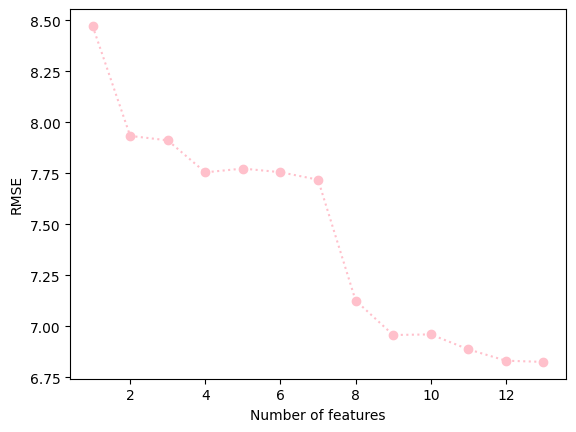

Best subset selection
Best RMSE: 6.826315956087174


In [81]:
# Best subset selection
k = 10
p = df.shape[1] - 1
folds = np.random.randint(1, k + 1, size=df.shape[0])
cv_errors = np.zeros((k, p))

for i in range(1, k + 1):
    train_data = df[folds != i]
    test_data = df[folds == i]
    X_train = train_data.drop('CRIM', axis=1)
    y_train = train_data['CRIM']
    X_test = test_data.drop('CRIM', axis=1)
    y_test = test_data['CRIM']

    best_fit = pd.DataFrame()
    best_rmse = float('inf')
    for j in range(1, p + 1):
        model = LinearRegression()
        model.fit(X_train.iloc[:, :j], y_train)
        pred = model.predict(X_test.iloc[:, :j])
        cv_errors[i - 1, j - 1] = np.mean((y_test - pred) ** 2)

rmse_cv = np.sqrt(np.mean(cv_errors, axis=0))
plt.plot(range(1, p + 1), rmse_cv, marker='o', linestyle=':', color='pink')
plt.xlabel("Number of features")
plt.ylabel("RMSE")
plt.show()

best_index = np.argmin(rmse_cv)
best_rmse = rmse_cv[best_index]
print(f"Best subset selection\nBest RMSE: {best_rmse}")

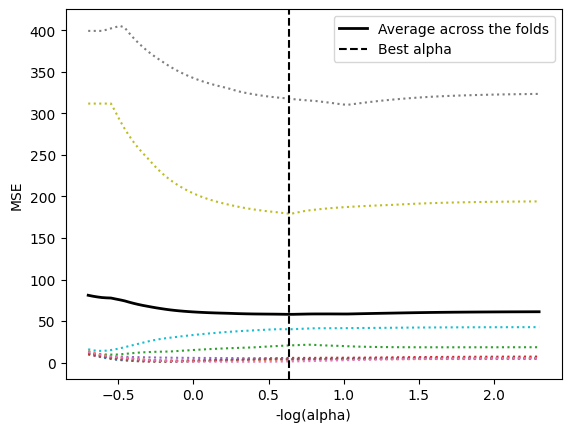

Lasso
Best RMSE: 7.6235774905174445


In [82]:
# Lasso
cv = 10
X = df.drop('CRIM', axis=1).values
y = df['CRIM'].values

X_scaled = StandardScaler().fit_transform(X)

lasso_cv = LassoCV(cv=cv)
lasso_cv.fit(X_scaled, y)

plt.plot(-np.log10(lasso_cv.alphas_), lasso_cv.mse_path_, ':')
plt.plot(-np.log10(lasso_cv.alphas_), lasso_cv.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(lasso_cv.alpha_), linestyle='--', color='k', label='Best alpha')
plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.legend()
plt.show()

best_lasso_rmse = np.sqrt(lasso_cv.mse_path_.mean(axis=-1).min())
print(f"Lasso\nBest RMSE: {best_lasso_rmse}")

In [83]:
# Ridge
ridge_cv = RidgeCV(cv=k)
ridge_cv.fit(X_scaled, y)

plt.plot(np.log(ridge_cv.alphas_), ridge_cv.cv_values_.T, ':')
plt.plot(np.log(ridge_cv.alphas_), ridge_cv.cv_values_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(np.log(ridge_cv.alpha_), linestyle='--', color='k', label='Best alpha')
plt.xlabel('log(alpha)')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()

best_ridge_rmse = np.sqrt(ridge_cv.cv_values_.mean(axis=-1).min())
print(f"Ridge - Best RMSE: {best_ridge_rmse}")

AttributeError: ignored

In [ ]:
results = [best_rmse, best_lasso_rmse, best_ridge_rmse, pcr_rmse]
print(results)

In [ ]:
from math import sqrt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
X = df.drop(["CRIM"], axis=1)
y = df['CRIM']
# print(f"{X.head()}\n{y.head()}\n")

X_train,  X_test,  y_train,  y_test  =  train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200]}
cv=5

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_search = GridSearchCV(lasso, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

lasso_best_lambda = grid_search.best_params_['alpha']
print(f"Best Lasso λ value: {lasso_best_lambda}\n")

lasso_model = Lasso(alpha=lasso_best_lambda)
lasso_model.fit(X_train, y_train)

lasso_predictions = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = sqrt(lasso_mse)
lasso_non_zero_coeffs = np.sum(lasso_model.coef_ != 0)
print(f"Lasso Test\nMSE: {lasso_mse:.3f}\nRMSE: {lasso_rmse:.3f}\n")
print(f"Number of non-zero coefficient estimates: {lasso_non_zero_coeffs}")

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 300]}
cv=5

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_search = GridSearchCV(ridge, param_grid, cv=cv)

grid_search.fit(X_train, y_train)

ridge_best_lambda = grid_search.best_params_['alpha']
print(f"Best Ridge λ value: {ridge_best_lambda}")

ridge_model = Ridge(alpha=ridge_best_lambda)

ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = sqrt(ridge_mse)
ridge_non_zero_coeffs = np.sum(ridge_model.coef_ != 0)
print(f"Ridge Test\nMSE: {ridge_mse:.3f}\nRMSE: {ridge_rmse:.3f}\n")
print(f"Number of non-zero coefficient estimates: {ridge_non_zero_coeffs}")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  cross_val_score

X = df.drop(["CRIM"], axis=1)
y = df['CRIM']
# print(f"{X.head()}\n{y.head()}\n")

X_train,  X_test,  y_train,  y_test  =  train_test_split(X, y, test_size=0.2, random_state=42)

max_components = min(X_train.shape[0], X_train.shape[1])
cv=5

cross_val_errors = []
for m in range(1, max_components + 1):
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(X_train)
    cv_scores = cross_val_score(LinearRegression(), X_train_pca, y_train, cv=cv, scoring='neg_mean_squared_error')
    cross_val_errors.append(-np.mean(cv_scores))

optimal_m = np.argmin(cross_val_errors) + 1
print(f"Optimal number of components (M) for PCR: {optimal_m}")

pca = PCA(n_components=optimal_m)
X_train_pca = pca.fit_transform(X_train)
pca_model = LinearRegression().fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)
y_pred = pca_model.predict(X_test_pca)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = sqrt(test_mse)
print(f"PCR Test\nMSE: {test_mse:.3f}\nRMSE: {test_rmse:.3f}")

In [ ]:
from sklearn.cross_decomposition import PLSRegression

param_grid = {
    'n_components': np.arange(1, min(X_train.shape[0], X_train.shape[1]) + 1)
}
cv=5

grid_search = GridSearchCV(PLSRegression(), param_grid, cv=cv)
grid_search.fit(X_train, y_train)

best_M = grid_search.best_params_['n_components']
print(f"Value of M selected by cross-validation for PLS: {best_M}")

pls_model = PLSRegression(n_components=best_M)
pls_model.fit(X_train, y_train)

y_pred = pls_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = sqrt(test_mse)
print(f"PLS Test\nMSE: {test_mse:.3f}\nRMSE: {test_rmse:.3f}")

##### (b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to using training error.

##### (c) Does your chosen model involve all of the features in the data set? Why or why not?

### Chapter 8: \#8 and \#11

#### 8. In the lab, a classifcation tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable

##### Setup

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Carseats.csv')

In [ ]:
df.head()

,SlNo,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SlNo         400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [ ]:
df.describe()

,SlNo,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
# Converting strings here manually instead of label encoding to assign a sequence to the bad/medium/good to let model infer an appropriate hierarchy there
df['US'] = df['US'].replace({'Yes': 1, 'No': 0})
df['Urban'] = df['Urban'].replace({'Yes': 1, 'No': 0})
df['ShelveLoc'] = df['ShelveLoc'].replace({'Bad': 0, 'Medium': 1, 'Good': 2})

In [ ]:
df.head()

,SlNo,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,0,42,17,1,1
1,2,11.22,111,48,16,260,83,2,65,10,1,1
2,3,10.06,113,35,10,269,80,1,59,12,1,1
3,4,7.40,117,100,4,466,97,1,55,14,1,1
4,5,4.15,141,64,3,340,128,0,38,13,1,0


##### (a) Split the data set into a training set and a test set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(["SlNo", "Sales"], axis=1)

In [ ]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [ ]:
y = df['Sales']

In [ ]:
y.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

In [ ]:
X_train,  X_test,  y_train,  y_test  =  train_test_split(X, y, test_size=0.2, random_state=42)

##### (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

Unpruned DTR Test MSE: 6.243438750000001



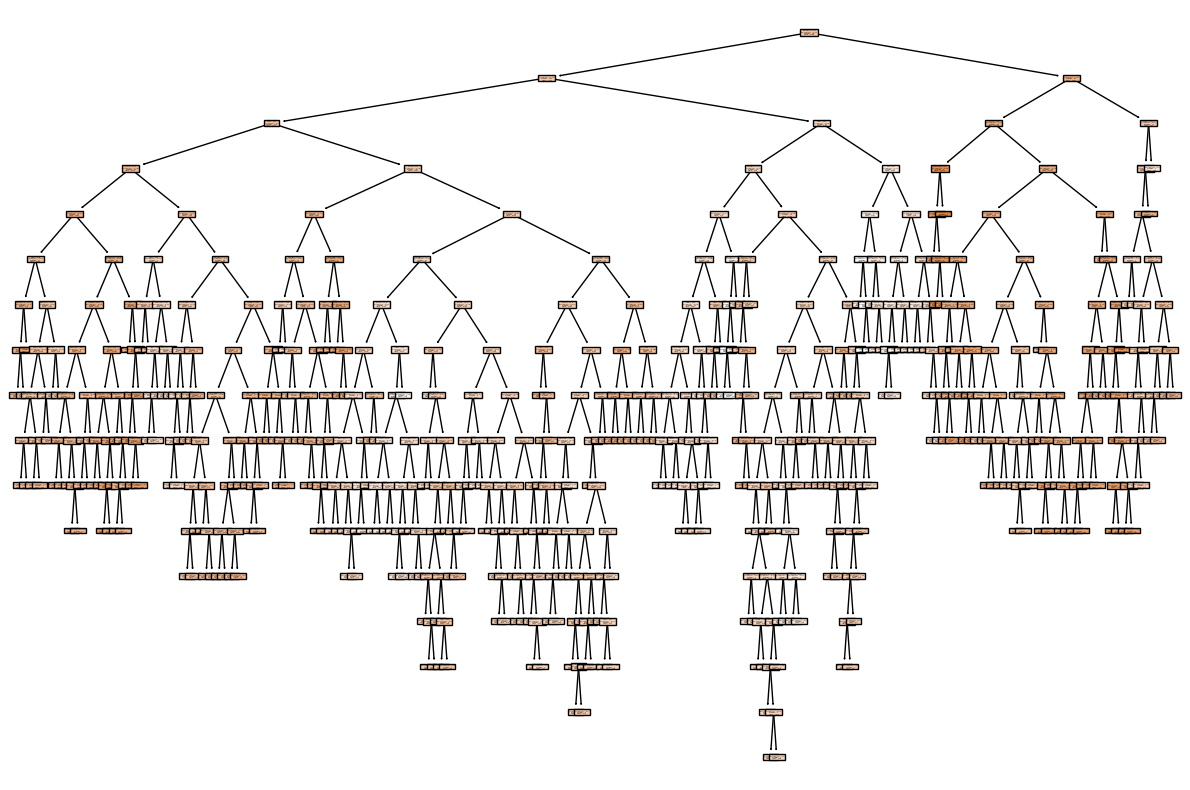

In [ ]:
# assigning None max depth to prune later on
unprun_dtr_model = DecisionTreeRegressor(max_depth = None, random_state = 42)

unprun_dtr_model.fit(X_train, y_train)

y_test_pred = unprun_dtr_model.predict(X_test)

unprun_dtr_test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Unpruned DTR Test MSE: {unprun_dtr_test_mse}\n")

plt.figure(figsize=(15, 10))
plot_tree(unprun_dtr_model, feature_names=X_train.columns, filled=True)
plt.show()

##### (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
# CV of 10 folds to try depths ranging from 1 to 10 to find optimal
cv = 10
tree_depths = range(1, 10)

cv_scores = []
for depth in tree_depths:
    reg_tree = DecisionTreeRegressor(max_depth=depth, random_state = 42)
    scores = cross_val_score(reg_tree, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_scores.append(-np.mean(scores))

optimal_depth = tree_depths[np.argmin(cv_scores)]
print(f"optimal_depth: {optimal_depth}")

optimal_depth: 6


Test MSE for the optimal tre 4.930793151203329



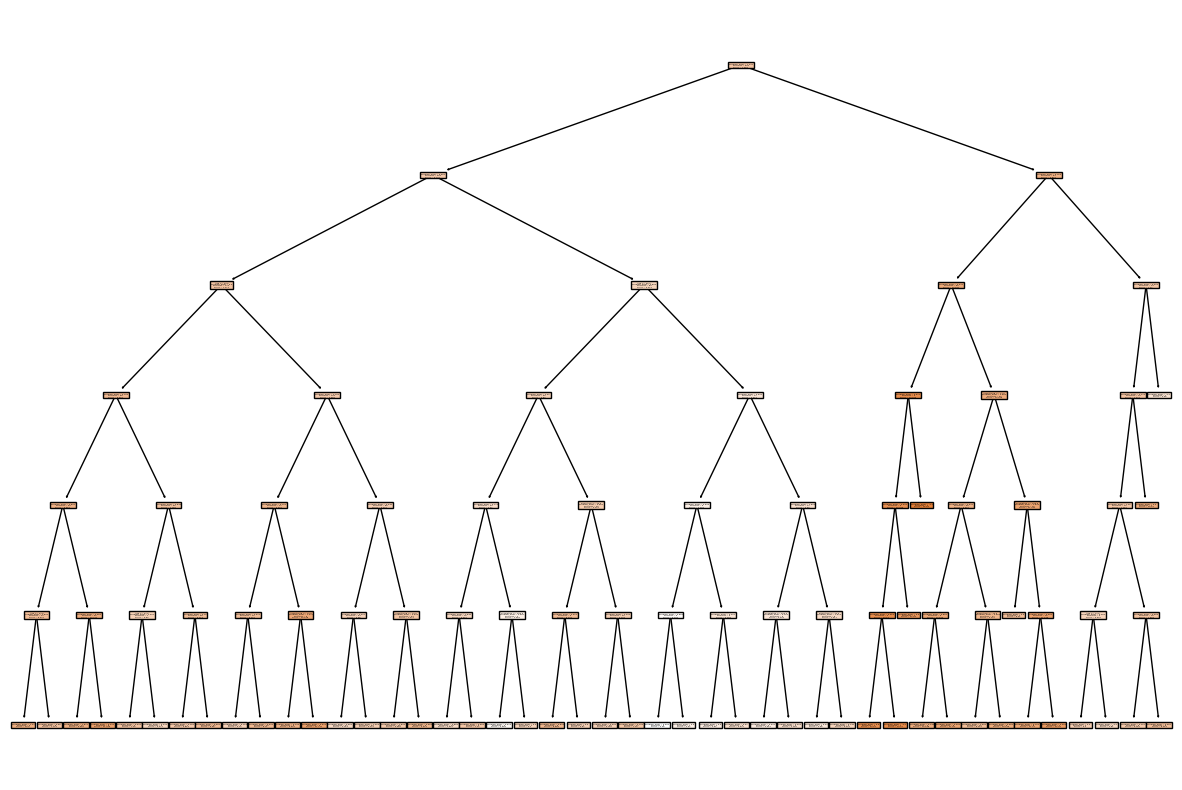

In [ ]:
# Repeating for tree model with optimal depth on full train set
opt_prun_dtr_model = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
opt_prun_dtr_model.fit(X_train, y_train)

y_test_pred = opt_prun_dtr_model.predict(X_test)

opt_prun_dtr_test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE for the optimal tre {opt_prun_dtr_test_mse}\n")

plt.figure(figsize=(15, 10))
plot_tree(opt_prun_dtr_model, feature_names=X_test.columns, filled=True)
plt.show()

In [ ]:
print(f"Test MSE Improvement b/w Unpruned DT and Optimized Pruned DT Models: {unprun_dtr_test_mse - opt_prun_dtr_test_mse}")

Test MSE Improvement b/w Unpruned DT and Optimized Pruned DT Models: 1.3126455987966716


Yes, pruning the tree (by controlling max_depth to achieve optimal value using cross-validation) has improved the test MSE compared to the unpruned, more complex tree.

##### (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Bagging Test MSE: 3.0478303086249983



<Figure size 1000x600 with 0 Axes>

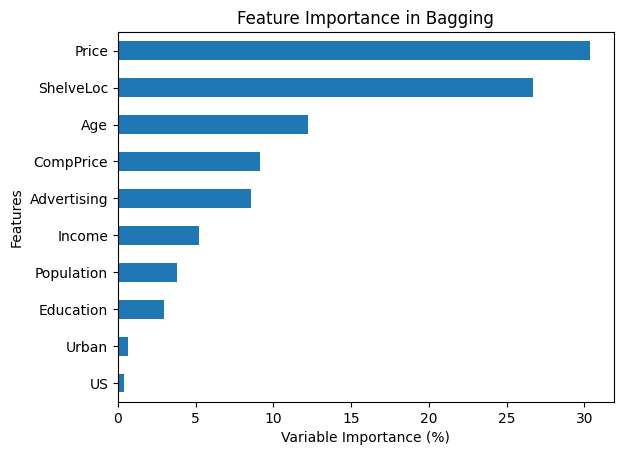

In [ ]:
bagging_regressor = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Test MSE: {test_mse}\n")

feature_importance_values = np.mean([tree.feature_importances_ for tree in bagging_regressor.estimators_], axis=0)
feature_importance_df = pd.DataFrame({'Importance': feature_importance_values*100}, index=X_train.columns)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
feature_importance_df.plot(kind='barh', legend=False)
plt.xlabel('Variable Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importance in Bagging')
plt.show()

##### (e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important. Describe the efect of m, the number of variables considered at each split, on the error rate obtained.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# variables setup
cv = 5
param_grid = {
    'n_estimators': [80, 100, 150, 200],
    'max_features': [3, 6, 10, 12]
}

# Perform grid search with cross-validation to find the best combination of n and m
random_forest = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv)
grid_search.fit(X_train, y_train)

MSE for all combinations of n and m
n     m     Train MSE 
80    3     3.102     
100   3     3.135     
150   3     3.150     
200   3     3.134     
80    6     2.871     
100   6     2.883     
150   6     2.814     
200   6     2.800     
80    10    2.825     
100   10    2.779     
150   10    2.751     
200   10    2.761     
80    12    2.825     
100   12    2.779     
150   12    2.751     
200   12    2.761     

Best MSE n and m
n     m    
150   150  

Random Forest Test MSE: 3.0478104443333307



<Figure size 1000x600 with 0 Axes>

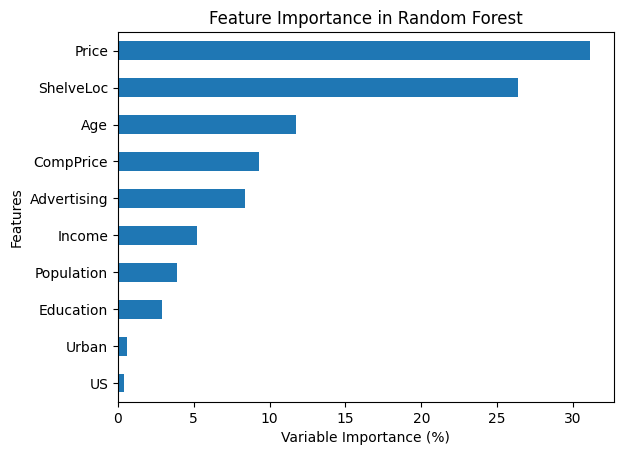

In [ ]:
# Print the MSE for all combinations of n and m
cv_results_df = pd.DataFrame(grid_search.cv_results_)
print(f"MSE for all combinations of n and m\n{'n':<5s} {'m':<5s} {'Train MSE':<10s}")
for _, row in cv_results_df.iterrows():
    n, m, mse = row['param_n_estimators'], row['param_max_features'], -row['mean_test_score']
    print(f"{n:<5d} {m:<5d} {mse:<10.3f}")
print(f"\nBest MSE n and m\n{'n':<5s} {'m':<5s}\n{grid_search.best_params_['n_estimators']:<5d} {grid_search.best_params_['n_estimators']:<5d}\n")

# Train the final RandomForestRegressor model using the best combination
final_rf_model = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_features=grid_search.best_params_['max_features'], random_state=42)
final_rf_model.fit(X_train, y_train)

# Test MSE on final RF model
y_pred = final_rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Test MSE: {test_mse}\n")

# Plot feature importance
importance = pd.DataFrame({'Importance':final_rf_model.feature_importances_*100}, index=X_train.columns)
importance_sorted = importance.sort_values('Importance', axis=0, ascending=True)
plt.figure(figsize=(10, 6))
importance_sorted.plot(kind='barh', legend=False)
plt.xlabel('Variable Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

The test MSE decreased when compared with Bagging. One possible explanation for this result is the effect of m (the number of variables considered at each split).

We can see that for the same n, as the m increases the Train MSE descreases.

##### (f) Now analyze the data using BART, and report your results.

#### 11. This question uses the Caravan data set.

##### Setup

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Caravan.csv', index_col="Unnamed: 0")

In [ ]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 1 to 5822
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOSTYPE   5822 non-null   int64 
 1   MAANTHUI  5822 non-null   int64 
 2   MGEMOMV   5822 non-null   int64 
 3   MGEMLEEF  5822 non-null   int64 
 4   MOSHOOFD  5822 non-null   int64 
 5   MGODRK    5822 non-null   int64 
 6   MGODPR    5822 non-null   int64 
 7   MGODOV    5822 non-null   int64 
 8   MGODGE    5822 non-null   int64 
 9   MRELGE    5822 non-null   int64 
 10  MRELSA    5822 non-null   int64 
 11  MRELOV    5822 non-null   int64 
 12  MFALLEEN  5822 non-null   int64 
 13  MFGEKIND  5822 non-null   int64 
 14  MFWEKIND  5822 non-null   int64 
 15  MOPLHOOG  5822 non-null   int64 
 16  MOPLMIDD  5822 non-null   int64 
 17  MOPLLAAG  5822 non-null   int64 
 18  MBERHOOG  5822 non-null   int64 
 19  MBERZELF  5822 non-null   int64 
 20  MBERBOER  5822 non-null   int64 
 21  MBERMIDD  5822

In [ ]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [ ]:
# Converting yes/no strings to 1/0 for binary classification
df['Purchase'] = df['Purchase'].replace({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


##### (a) Create a training set consisting of the frst 1,000 observations, and a test set consisting of the remaining observations.

In [ ]:
train_df = df[:1000]
test_df = df[1000:]

X_train = train_df.drop(columns=["Purchase"])
y_train = train_df["Purchase"]

X_test = test_df.drop(columns=["Purchase"])
y_test = test_df["Purchase"]

# Scaling the data since it's needed for Logistic Regresion and KNN but doesn't impact Boosting results
standard_scaler = StandardScaler()
X_train = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(standard_scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

##### (b) Fit a boosting model to the training set with Purchase as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
boost = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
boost.fit(X_train, y_train)

feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index = X_train.columns).sort_values(ascending=False, inplace = False)
print(f"Most important predictors:\n{rel_imp}")

Most important predictors:
PPERSAUT    7.487938
MOSTYPE     6.226180
ABRAND      5.664783
MGODGE      5.299291
MKOOPKLA    5.020059
              ...   
APERSONG    0.000000
AVRAAUT     0.000000
PVRAAUT     0.000000
PWERKT      0.000000
PPERSONG    0.000000
Length: 85, dtype: float64


##### (c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [ ]:
y_pred_boost = boost.predict(X_test)
print(f"y_pred_boost: {y_pred_boost}\n")
print(f"Logistic Regression Model Metrics:\nAccuracy: {accuracy_score(y_test, y_pred_boost):.3f}\nPrecision: {precision_score(y_test, y_pred_boost):.3f}\nRecall: {recall_score(y_test, y_pred_boost):.3f}\nF1 Score: {f1_score(y_test, y_pred_boost):.3f}\n")

y_pred_boost_prob = boost.predict_proba(X_test)[:, 1]
print(f"y_pred_boost_prob: {y_pred_boost_prob}\n")

y_pred_boost_threshold = y_pred_boost_prob > 0.2
print(f"y_pred_boost_threshold: {y_pred_boost_threshold}\n")

labels = sorted(list(set(y_test)))
conf_matrix_boost = confusion_matrix(y_test, y_pred_boost_threshold)
conf_matrix_df = pd.DataFrame(conf_matrix_boost, index=labels, columns=labels)
fraction_true_positives_boost = conf_matrix_boost[1, 1] / conf_matrix_boost[1, :].sum()
print(f"Confusion Matrix:\n{conf_matrix_df}\n\nFraction of people predicted to make a purchase who actually make one: {conf_matrix_boost[1, 1]}/{conf_matrix_boost[1, :].sum()}={fraction_true_positives_boost:.3f}")

y_pred_boost: [0 0 0 ... 0 0 0]

Logistic Regression Model Metrics:
Accuracy: 0.933
Precision: 0.242
Recall: 0.052
F1 Score: 0.085

y_pred_boost_prob: [0.02579479 0.04483684 0.015305   ... 0.04764069 0.10499919 0.02615667]

y_pred_boost_threshold: [False False False ... False False False]

Confusion Matrix:
      0    1
0  4335  198
1   251   38

Fraction of people predicted to make a purchase who actually make one: 38/289=0.131


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
print(f"y_pred_logreg: {y_pred_logreg}\n")
print(f"Logistic Regression Model Metrics:\nAccuracy: {accuracy_score(y_test, y_pred_logreg):.3f}\nPrecision: {precision_score(y_test, y_pred_logreg):.3f}\nRecall: {recall_score(y_test, y_pred_logreg):.3f}\nF1 Score: {f1_score(y_test, y_pred_logreg):.3f}\n")

y_pred_logreg_prob = logreg.predict_proba(X_test)[:, 1]
print(f"y_pred_logreg_prob: {y_pred_logreg_prob}\n")

y_pred_logreg_threshold = y_pred_logreg_prob > 0.2
print(f"y_pred_logreg_threshold: {y_pred_logreg_threshold}\n")

labels = sorted(list(set(y_test)))
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg_threshold)
conf_matrix_df = pd.DataFrame(conf_matrix_logreg, index=labels, columns=labels)
fraction_true_positives_logreg = conf_matrix_logreg[1, 1] / conf_matrix_logreg[1, :].sum()
print(f"Confusion Matrix:\n{conf_matrix_df}\n\nFraction of people predicted to make a purchase who actually make one: {conf_matrix_logreg[1, 1]}/{conf_matrix_logreg[1, :].sum()}={fraction_true_positives_logreg:.3f}")


y_pred_logreg: [0 0 0 ... 0 0 0]

Logistic Regression Model Metrics:
Accuracy: 0.934
Precision: 0.235
Recall: 0.042
F1 Score: 0.071

y_pred_logreg_prob: [0.00035834 0.01234351 0.03844395 ... 0.0647438  0.09027435 0.02236253]

y_pred_logreg_threshold: [False False False ... False False False]

Confusion Matrix:
      0    1
0  4297  236
1   239   50

Fraction of people predicted to make a purchase who actually make one: 50/289=0.173


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(f"Best KNN Model Metrics:\nAccuracy: {accuracy_score(y_test, y_pred_knn):.3f}\nPrecision: {precision_score(y_test, y_pred_knn):.3f}\nRecall: {recall_score(y_test, y_pred_knn):.3f}\nF1 Score: {f1_score(y_test, y_pred_knn):.3f}\n")

y_pred_knn_prob = knn.predict_proba(X_test)[:, 1]
print(f"y_pred_knn_prob: {y_pred_knn_prob}\n")

y_pred_knn_threshold = y_pred_knn_prob > 0.2
print(f"y_pred_knn_threshold: {y_pred_knn_threshold}\n")

labels = sorted(list(set(y_test)))
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn_threshold)
conf_matrix_df = pd.DataFrame(conf_matrix_knn, index=labels, columns=labels)
fraction_true_positives_knn = conf_matrix_knn[1, 1] / conf_matrix_knn[1, :].sum()
print(f"Confusion Matrix:\n{conf_matrix_df}\n\nFraction of people predicted to make a purchase who actually make one: {conf_matrix_knn[1, 1]}/{conf_matrix_knn[1, :].sum()}={fraction_true_positives_knn:.3f}")

Best KNN Model Metrics:
Accuracy: 0.938
Precision: 0.200
Recall: 0.014
F1 Score: 0.026

y_pred_knn_prob: [0.25 0.   0.25 ... 0.   0.25 0.  ]

y_pred_knn_threshold: [ True False  True ... False  True False]

Confusion Matrix:
      0    1
0  3547  986
1   191   98

Fraction of people predicted to make a purchase who actually make one: 98/289=0.339


Of the 3 models, KNN seems to have the best results for predicting the fraction of people, followed by Logistic Regression and Boosting

### Chapter 10: \#7

#### 7. Fit a neural network to the Default data.

##### Setup

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Default.csv', index_col="Unnamed: 0")

In [ ]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [ ]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [ ]:
# Converting yes/no strings to 1/0 for binary classification
df['default'] = df['default'].replace({'Yes': 1, 'No': 0})
df['student'] = df['student'].replace({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


##### (a) Use a single hidden layer with 10 units, and dropout regularization.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop(columns=['default'])
X.head(5)

,student,balance,income
1,0,729.526495,44361.625074
2,1,817.180407,12106.134700
3,0,1073.549164,31767.138947
4,0,529.250605,35704.493935
5,0,785.655883,38463.495879


In [ ]:
y = df['default']
y.head(5)

1    0
2    0
3    0
4    0
5    0
Name: default, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numerical_features = ['balance', 'income']

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# alpha here controls dropout regularization
nn = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', alpha=0.01, random_state=42)

nn.fit(X_train_scaled, y_train)

y_test_pred = nn.predict(X_test_scaled)

accuracy_nn = accuracy_score(y_test, y_test_pred)
precision_nn = precision_score(y_test, y_test_pred)
recall_nn = recall_score(y_test, y_test_pred)
f1_nn = f1_score(y_test, y_test_pred)
labels = sorted(list(set(y_test)))
conf_matrix_nn = confusion_matrix(y_test, y_test_pred)
conf_matrix_nn = pd.DataFrame(conf_matrix_nn, index=labels, columns=labels)
print(f"Logistic Regression\n\nAccuracy: {accuracy_nn:.3f}\nPrecision: {precision_nn:.3f}\nRecall: {recall_nn:.3f}\nF1-score: {f1_nn:.3f}\n\nConfusion Matrix:\n{conf_matrix_nn}")

Logistic Regression

Accuracy: 0.970
Precision: 0.667
Recall: 0.261
F1-score: 0.375

Confusion Matrix:
      0   1
0  1922   9
1    51  18


##### (b) Compare the classifcation performance of your model with that of linear logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train_scaled, y_train)

y_test_pred = logreg.predict(X_test_scaled)

accuracy_logreg = accuracy_score(y_test, y_test_pred)
precision_logreg = precision_score(y_test, y_test_pred)
recall_logreg = recall_score(y_test, y_test_pred)
f1_logreg = f1_score(y_test, y_test_pred)
labels = sorted(list(set(y_test)))
conf_matrix_logreg = confusion_matrix(y_test, y_test_pred)
conf_matrix_logreg = pd.DataFrame(conf_matrix_logreg, index=labels, columns=labels)
print(f"Logistic Regression\n\nAccuracy: {accuracy_logreg:.3f}\nPrecision: {precision_logreg:.3f}\nRecall: {recall_logreg:.3f}\nF1-score: {f1_logreg:.3f}\n\nConfusion Matrix:\n{conf_matrix_logreg}")

Logistic Regression

Accuracy: 0.970
Precision: 0.655
Recall: 0.275
F1-score: 0.388

Confusion Matrix:
      0   1
0  1921  10
1    50  19


Both MLPClassifier and LogisticRegression give very similar results

## Other Problems

### Problem 1: Beauty Pays!
Professor Daniel Hamermesh from UT’s economics department has been studying the im-
pact of beauty in labor income (yes, this is serious research!!).
First, watch the following video:
http://thedailyshow.cc.com/videos/37su2t/ugly-people-prejudice
It turns out this is indeed serious research and Dr. Hamermesh has demonstrated the effect
of beauty into income in a variety of different situations. Here’s an example: in the paper
“Beauty in the Classroom”
they showed that
“...instructors who are viewed as better looking
receive higher instructional ratings”
leading to a direct impact in the salaries in the long
run.
By now, you should know that this is a hard effect to measure. Not only one has to work
hard to figure out a way to measure “beauty” objectively (well, the video said it all!) but
one also needs to
“adjust for many other determinants”
(gender, lower division class, native
language, tenure track status).
So, Dr. Hamermesh was kind enough to share the data for this paper with us. It is available
in our class website in the file
“BeautyData.csv”
. In the file you will find, for a number
of UT classes, course ratings, a relative measure of beauty for the instructors, and other
potentially relevant variables.

##### Setup

In [74]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [34]:
beauty_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/BeautyData.csv')

In [37]:
beauty_df.shape

(463, 6)

In [35]:
beauty_df.head()

,CourseEvals,BeautyScore,female,lower,nonenglish,tenuretrack
0,3.235245,0.201567,1,0,0,1
1,3.226328,-0.826081,0,0,0,1
2,3.647712,-0.660333,0,0,0,1
3,3.372062,-0.766312,1,0,0,1
4,4.292705,1.421445,1,0,0,1


In [36]:
beauty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CourseEvals  463 non-null    float64
 1   BeautyScore  463 non-null    float64
 2   female       463 non-null    int64  
 3   lower        463 non-null    int64  
 4   nonenglish   463 non-null    int64  
 5   tenuretrack  463 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 21.8 KB


In [38]:
beauty_df.describe()

,CourseEvals,BeautyScore,female,lower,nonenglish,tenuretrack
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,3.689415,-0.088349,0.421166,0.339093,0.060475,0.779698
std,0.525928,0.788648,0.494280,0.473913,0.238623,0.414899
min,1.944243,-1.538843,0.000000,0.000000,0.000000,0.000000
25%,3.326226,-0.744618,0.000000,0.000000,0.000000,1.000000
50%,3.681537,-0.156363,0.000000,0.000000,0.000000,1.000000
75%,4.067423,0.457253,1.000000,1.000000,0.000000,1.000000
max,5.000000,1.881674,1.000000,1.000000,1.000000,1.000000


##### 1. Using the data, estimate the effect of “beauty” into course ratings. Make sure to think about the potential many “other determinants” . Describe your analysis and your conclusions.

In [39]:
X = beauty_df.drop('CourseEvals', axis=1)
X = sm.add_constant(X)
y = beauty_df['CourseEvals']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            CourseEvals   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     48.58
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           2.71e-40
Time:                        00:19:17   Log-Likelihood:                -260.27
No. Observations:                 463   AIC:                             532.5
Df Residuals:                     457   BIC:                             557.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0654      0.051     79.020      

##### 2. In his paper, Dr. Hamermesh has the following sentence: “Disentangling whether this outcome represents productivity or discrimination is, as with the issue generally, probably impossible” . Using the concepts we have talked about so far, what does he mean by that?

Based on this analysis, we can conclude that while BeautyScore, female, lower, and nonenglish are all significant predictors of course ratings based on their p-value (P>|t|) being very small (close to 0), the effect of BeautyScore has the most substantial impact as seen by its higher coefficient and very low p-value.

Dr. Hamermesh's statement refers to the difficulty in determining if the observed correlation between beauty and increased labor income is due to either increased productivity or discrimination due to beauty.

Productivity in this context could mean that more aesthetically pleasing individuals might be more confident or better communicators, making them better performers and earnings higher ratings.

However, it could also be that the people evaluating these individuals (students in the above example) have inherent biases that favor more attractive people, regardless of actual productivity. This would be discriminatory and lead to potentially lower ratings.

The challenge lies in isolating these effects from each other, which can be complicated due to the intricacies of human behavior and other factors that could influence the outcome. This matches the concept discussed in class about the inherent difficulties of separating correlation from causation, and the potential issues arising from variables not present within the data.

### Problem 2: Housing Price Structure
Thefile
MidCity.xls
, available on the class website, contains data on 128 recent sales of
houses in a town. For each sale, the file shows the neighborhood in which the house is
located, the number of offers made on the house, the square footage, whether the house
is made out of brick, the number of bathrooms, the number of bedrooms, and the selling
price. Neighborhoods 1 and 2 are more traditional whereas 3 is a more modern, newer and
more prestigious part of town. Use regression models to estimate the pricing structure of
houses in this town and answer the following questions

##### Setup

In [61]:
homes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/MidCity.csv', index_col="Home")

In [62]:
homes_df.shape

(128, 7)

In [63]:
homes_df.head()

,Nbhd,Offers,SqFt,Brick,Bedrooms,Bathrooms,Price
Home,,,,,,,
1,2,2,1790,No,2,2,114300
2,2,3,2030,No,4,2,114200
3,2,1,1740,No,3,2,114800
4,2,3,1980,No,3,2,94700
5,2,3,2130,No,3,3,119800


In [64]:
homes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 1 to 128
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Nbhd       128 non-null    int64 
 1   Offers     128 non-null    int64 
 2   SqFt       128 non-null    int64 
 3   Brick      128 non-null    object
 4   Bedrooms   128 non-null    int64 
 5   Bathrooms  128 non-null    int64 
 6   Price      128 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 8.0+ KB


In [65]:
homes_df.describe()

,Nbhd,Offers,SqFt,Bedrooms,Bathrooms,Price
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.960938,2.578125,2000.937500,3.023438,2.445312,130427.343750
std,0.807469,1.069324,211.572431,0.725951,0.514492,26868.770371
min,1.000000,1.000000,1450.000000,2.000000,2.000000,69100.000000
25%,1.000000,2.000000,1880.000000,3.000000,2.000000,111325.000000
50%,2.000000,3.000000,2000.000000,3.000000,2.000000,125950.000000
75%,3.000000,3.000000,2140.000000,3.000000,3.000000,148250.000000
max,3.000000,6.000000,2590.000000,5.000000,4.000000,211200.000000


In [66]:
homes_df["Brick"] = homes_df["Brick"].replace({"Yes": 1, "No": 0})

##### 1. Is there a premium for brick houses everything else being equal?

In [67]:
X = homes_df[['Nbhd', 'Offers', 'SqFt', 'Brick', 'Bathrooms', 'Bedrooms']]
X = sm.add_constant(X)

y = homes_df['Price']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     95.42
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.76e-43
Time:                        00:31:09   Log-Likelihood:                -1374.8
No. Observations:                 128   AIC:                             2764.
Df Residuals:                     121   BIC:                             2784.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9848.1626   9818.682     -1.003      0.3

Since Brick's p-value is 0 (less than 0.05) and the coefficient is 1.56e+04, it suggests there is a significant positive premium on the price for brick houses, all other things being equal.

##### 2. Is there a premium for houses in neighborhood 3?

In [68]:
# Convert neighborhood to dummy variables
neighborhood_dummies = pd.get_dummies(homes_df['Nbhd'], prefix='Nbhd', drop_first=True)
homes_df = pd.concat([homes_df, neighborhood_dummies], axis=1)

X = homes_df[['Nbhd_2', 'Nbhd_3', 'Offers', 'SqFt', 'Brick', 'Bathrooms', 'Bedrooms']]
X = sm.add_constant(X)

y = homes_df['Price']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           8.25e-50
Time:                        00:31:11   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2159.4982   8877.810      0.243      0.8

Since Nbhd_3's p-value is 0 (less than 0.05) and the coefficient is 1.73e+04, it suggests there is a significant positive premium on the price for brick houses in neighborhood 3, all other things being equal.

##### 3. Is there an extra premium for brick houses in neighborhood 3?

In [72]:
# Create interaction term
homes_df['Brick_Nbhd_3'] = homes_df['Brick'] * homes_df['Nbhd_3']

X = homes_df[['Nbhd_3', 'Offers', 'SqFt', 'Brick', 'Bathrooms', 'Bedrooms', 'Brick_Nbhd_3']]
X = sm.add_constant(X)

y = homes_df['Price']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     119.8
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           4.62e-51
Time:                        00:33:56   Log-Likelihood:                -1353.6
No. Observations:                 128   AIC:                             2723.
Df Residuals:                     120   BIC:                             2746.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3407.4874   8559.390      0.398   

Since Brick_Nbhd_3's p-value is 0.013 (less than 0.05) and the coefficient is 1.036e+04, it suggests there is a significant positive premium on the price for brick houses in neighborhood 3, all other things being equal.

##### 4. For the purposes of prediction could you combine the neighborhoods 1 and 2 into a single “older” neighborhood?

In [73]:
# Combine neighborhoods 1 and 2
homes_df['Nbhd_1_2'] = ((homes_df['Nbhd'] == 1) | (homes_df['Nbhd'] == 2)).astype(int)

X = homes_df[['Nbhd_1_2', 'Offers', 'SqFt', 'Brick', 'Bathrooms', 'Bedrooms']]
X = sm.add_constant(X)

y = homes_df['Price']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     132.8
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           8.44e-51
Time:                        00:37:35   Log-Likelihood:                -1356.9
No. Observations:                 128   AIC:                             2728.
Df Residuals:                     121   BIC:                             2748.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.501e+04   9658.403      2.589      0.0

Since Nbhd_1_2's p-value is 0 (less than 0.05) and the coefficient for is -2.194e+04, it suggests there is a significant negative premium on the price for brick houses in neighborhood 3, all other things being equal.

### Problem 3: What causes what??
Listen to this podcast:
http://www.npr.org/blogs/money/2013/04/23/178635250/episode-453-what-causes-what

#### 1. Why can’t I just get data from a few different cities and run the regression of “Crime” on “Police” to understand how more cops in the streets affect crime? (“Crime” refers to some measure of crime rate and “Police” measures the number of cops in a city)

The approach of running a regression of "Crime" on "Police" using data from a few cities might not yield reliable or comprehensive results due to several reasons:
- There may not be a sufficient amount of data for all cities which may cause one to have a bias in the cities chosen.
- Bias may also exist in factors specific to the cities chosen such as population density, systemic issues etc.
- There far too many factors that influence crime rates besides the number of police officers in a city, whiuch if not controlled for, the results of the regression may be misleading.
- There might be a problem where it appears that more police leads to more crime when in reality more police are deployed in cities where crime rates are already higher

#### 2. How were the researchers from UPENN able to isolate this effect? Briefly describe their approach and discuss their result in the “Table 2” below.

The researchers used a "High Alert" variable to act as an instrument to isolate the effect of police on crime. They utilized these "High Alert" days in DC when the amount of police in the streets dramatically increased due to external events, like national security threats.

The increased police presence on these "High Alert" days is random and unrelated to the daily crime rate in the city, thus potentially removing issues of causality.

In the "Table 2", Column 1 presents the model using "High Alert" as the only variable. The coefficient of -7.316, signifies that on such days, the total number of daily crimes decreased by approximately 7.316, which is a statistically significant result is statistically significant at the 5% level (*).

This approach allowed them to control for other variables that could influence crime rates, and suggests that an increase in police presence leads indeed to a decrease in crime rates.


#### 3. Why did they have to control for METRO ridership? What was that trying to capture?

Column 2 of "Table 2" controls for the METRO ridership, where the researchers accounted for the number of people using public transit during "High Alert" days, since more people on the streets could potentially lead to higher crime rates. Its coefficient of is 17.341, which is significant at the 1% level, indicating that as the number of midday riders increases, crime increases.

#### 4. In the next page, I am showing you “Table 4” from the research paper. Just focus on the first column of the table. Can you describe the model being estimated here? What is the conclusion?

The model here in the first column of "Table 4" includes:
1. High Alert x District 1: An interaction term between the High Alert variable and a dummy variable, District 1.
2. High Alert x Other Districts: An interaction term between High Alert and a composite variable representing all other district areas except District 1.
3. Log(midday ridership): This variable captures the log of the number of people using public transportation during midday.

This model is basically trying to estimate the relationship between the occurrence of crime and the three variables above. Their coefficients represent the changes in the crime rate per unit change in the related variable, assuming other variables remain constant.

Looking at the results:
- High Alert x District 1 has a statistically significant coefficient of 2.621 at a 1% level.
- High Alert x Other Districts has a coefficient of .571, but it is not statistically significant as the p-value presumably is larger than 0.05 (because there are no * or **).
- Log(midday ridership) has a statistically significant coefficient of 2.477 at a 5% level.

This implies that on "High Alert" days, crime decreases more substantially in District 1 compared to other districts, suggesting gretter impact of police presence in that area. Also, as midday ridership increases, crime also increases, consistent with the assumption that higher population density leads to more crime.

### Problem 5: Final Project
Describe your contribution to the final group project (1/2 page max).